### Deliverable 3: Second Optimization Attempt

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
new_app_df = application_df.drop(columns=['EIN', 'NAME'])
new_app_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
new_app_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
new_app_df_counts = new_app_df.APPLICATION_TYPE.value_counts()
new_app_df_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

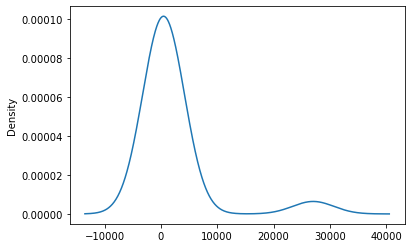

In [5]:
# Visualize the value counts of APPLICATION_TYPE
new_app_df_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(new_app_df_counts[new_app_df_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    new_app_df.APPLICATION_TYPE = new_app_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
new_app_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts = new_app_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

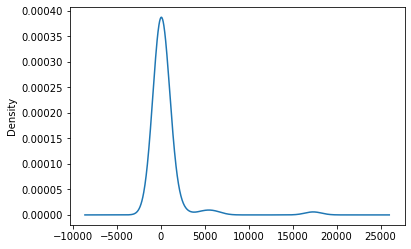

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1500].index)

# Replace in dataframe
for cls in replace_class:
    new_app_df.CLASSIFICATION = new_app_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
new_app_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = new_app_df.dtypes[new_app_df.dtypes == 'object'].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(new_app_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
new_app_df = new_app_df.merge(encode_df,left_index=True, right_index=True).drop(application_cat,1)
new_app_df.head()

C:\Users\tonyw\AppData\Local\Temp/ipykernel_21336/3064941428.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_app_df = new_app_df.merge(encode_df,left_index=True, right_index=True).drop(application_cat,1)


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = new_app_df["IS_SUCCESSFUL"].values
X = new_app_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

C:\Users\tonyw\AppData\Local\Temp/ipykernel_21336/3251977063.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = new_app_df.drop(["IS_SUCCESSFUL"],1).values


In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Compile, Train and Evaluate the Model:
- Added 3rd and 4th hidden layer with 50 and 80 neurons, respectively.
- Change activation to 'tanh' for 2nd and 3rd hidden layer
- Increase Epochs to 100

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[1])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 50
hidden_nodes_layer4 = 80

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 50)                1550      
                                                                 
 dense_3 (Dense)             (None, 80)                4080      
                                                                 
 dense_4 (Dense)             (None, 1)                 81        
                                                                 
Total params: 11,661
Trainable params: 11,661
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 824us/step - loss: 0.5663 - accuracy: 0.7223
Epoch 2/100
804/804 [==============================] - 1s 851us/step - loss: 0.5551 - accuracy: 0.7258
Epoch 3/100
804/804 [==============================] - 1s 811us/step - loss: 0.5527 - accuracy: 0.7312
Epoch 4/100
804/804 [==============================] - 1s 809us/step - loss: 0.5504 - accuracy: 0.7316
Epoch 5/100
804/804 [==============================] - 1s 932us/step - loss: 0.5499 - accuracy: 0.7314
Epoch 6/100
804/804 [==============================] - 1s 979us/step - loss: 0.5487 - accuracy: 0.7324
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5481 - accuracy: 0.7334
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5470 - accuracy: 0.7339
Epoch 9/100
804/804 [==============================] - 1s 998us/step - loss: 0.5468 - accuracy: 0.7328
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0

804/804 [==============================] - 1s 832us/step - loss: 0.5339 - accuracy: 0.7399
Epoch 81/100
804/804 [==============================] - 1s 804us/step - loss: 0.5336 - accuracy: 0.7398
Epoch 82/100
804/804 [==============================] - 1s 809us/step - loss: 0.5337 - accuracy: 0.7401
Epoch 83/100
804/804 [==============================] - 1s 802us/step - loss: 0.5346 - accuracy: 0.7402
Epoch 84/100
804/804 [==============================] - 1s 849us/step - loss: 0.5338 - accuracy: 0.7402
Epoch 85/100
804/804 [==============================] - 1s 928us/step - loss: 0.5343 - accuracy: 0.7395
Epoch 86/100
804/804 [==============================] - 1s 853us/step - loss: 0.5342 - accuracy: 0.7400
Epoch 87/100
804/804 [==============================] - 1s 820us/step - loss: 0.5340 - accuracy: 0.7400
Epoch 88/100
804/804 [==============================] - 1s 792us/step - loss: 0.5334 - accuracy: 0.7402
Epoch 89/100
804/804 [==============================] - 1s 900us/step - loss:

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5601 - accuracy: 0.7296 - 246ms/epoch - 916us/step
Loss: 0.5601481199264526, Accuracy: 0.7295626997947693


<AxesSubplot:>

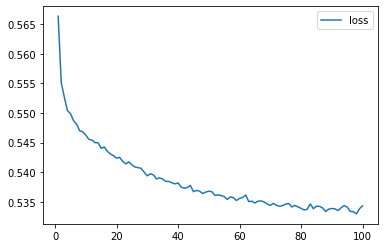

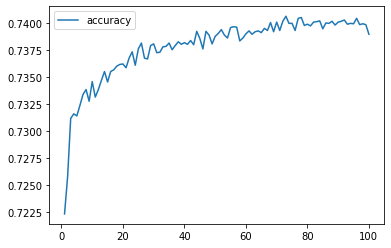

In [19]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss and accuracy
history_df.plot(y="loss")
history_df.plot(y="accuracy")

In [20]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_Optimization2/",exist_ok=True)
checkpoint_path = "checkpoints_Optimization2/weights.{epoch:02d}.hdf5"

In [21]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 1s 836us/step - loss: 0.5350 - accuracy: 0.7393
Epoch 2/100
804/804 [==============================] - 1s 855us/step - loss: 0.5346 - accuracy: 0.7400
Epoch 3/100
804/804 [==============================] - 1s 947us/step - loss: 0.5337 - accuracy: 0.7404
Epoch 4/100
804/804 [==============================] - 1s 974us/step - loss: 0.5340 - accuracy: 0.7406
Epoch 5/100
790/804 [============================>.] - ETA: 0s - loss: 0.5339 - accuracy: 0.7402
Epoch 5: saving model to checkpoints_Optimization2\weights.05.hdf5
804/804 [==============================] - 1s 986us/step - loss: 0.5338 - accuracy: 0.7402
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5339 - accuracy: 0.7411
Epoch 7/100
804/804 [==============================] - 1s 836us/step - loss: 0.5330 - accuracy: 0.7404
Epoch 8/100
804/804 [==============================] - 1s 818us/step - loss: 0.5333 - accuracy: 0.7404
Epoch 9/100
804/804 [=====

804/804 [==============================] - 1s 867us/step - loss: 0.5326 - accuracy: 0.7415
Epoch 62/100
804/804 [==============================] - 1s 821us/step - loss: 0.5320 - accuracy: 0.7406
Epoch 63/100
804/804 [==============================] - 1s 853us/step - loss: 0.5321 - accuracy: 0.7418
Epoch 64/100
804/804 [==============================] - 1s 814us/step - loss: 0.5332 - accuracy: 0.7408
Epoch 65/100
790/804 [============================>.] - ETA: 0s - loss: 0.5326 - accuracy: 0.7398
Epoch 65: saving model to checkpoints_Optimization2\weights.65.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5319 - accuracy: 0.7405
Epoch 66/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5319 - accuracy: 0.7411
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5320 - accuracy: 0.7406
Epoch 68/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5322 - accuracy: 0.7404
Epoch 69/100
804/804 [==============

In [22]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization2.h5")

In [23]:
# No Importment with accuracy with adding a 3rd/4th hidden layer,
# Change activation to 'tanh' for 2nd and 3rd hidden layers,
# Increase Epoch to 100